# Lecture 14: Heterodyne Radios

EE-40453, Digital Radio Communications, Spring 2020

J. Nicholas Laneman, Bertrand Hochwald, & Jonathan Chisum<br>
Wireless Institute & Department of Electrical Engineering<br>
University of Notre Dame

Copyright 2020, All Rights Reserved

## Summary

In this lecture, we will address some of the limitations of homodyne radios by adding adding stages of frequency upconversion in the transmitter and downconversion in the receiver. Such techniques lead to *heterodyne* radios, and provide additional flexibility in order to improve radio performance.

[comment]: # (Lecture was about 10 minutes too short on 2/14/2020.)

## Motivation in Course Context

In the previous week of lecture and lab, we studied various techniques from upconverting a baseband signal to a passband carrier frequency, and correspondingly downconverting a passband signal back to baseband. Frequecny up- and down-conversion were each performed in one step, which is called *homodyning*.

By contrast, in the next few lectures, we will develop conceptual understanding and practical system design guidelines for performing frequency up- and down-conversion in multiple steps, which is called *heterodyning*.

These two approaches are illustrated in the figure below.

<img src="images/01.png" width="80%">

## Outline

* Terminology

* Heterodyne Concepts

* Circuit Issues

## Terminology

**Defintion:** An *intermediate frequency (IF)* is a positive frequency aside from the carrier frequency that is used as part of the transmitter modulation or receiver modulation process.

**Definition:** Using one (or more) intermediate frequencies as part of a transmit or receive chain is called *heterodyning*.

**Definition:** Using no intermediate frequencies as part of a transmit or receive chain is called *homodyning*. Another recently-used term for such techniques is *direct conversion*.

## Heterodyne Concepts

Let $s_i(t)$ be a signal of passband bandwidth at most $2B$, $B > 0$, at the intermediate frequency $f_i > B$.

For generality, we will consider that $s_i(t)$ is generated from quadrature multiplexing of two real-valued baseband signals $m_1(t)$ and $m_2(t)$, each with baseband bandwidth $B$, according to

$$s_i(t) = m_1(t)\cos(2\pi f_i t) - m_2(t)\sin(2\pi f_i t)$$

Recall that:

* For DSB-SC, $m_2(t)=0$

* For SSB, $m_2(t)$ is the positive or negative Hilbert transform of $m_1(t)$, and the passband bandwidth is only $B$.

* Otherwise, we can view the modulation scheme as inputting a complex-valued baseband signal $m(t)=m_1(t)+j m_2(t)$ and creating

$$s_i(t) = \mathrm{Re}\left\{ m(t) e^{j2\pi f_i t} \right\}$$

### IF to Carrier Passband Conversion

If we modulate $s_i(t)$ with another sinusoidal oscillator signal of frequency $f_{o} > f_{i}$, we have

$$\begin{align}
s_i(t) \cos(2\pi f_o t + \vartheta) =& m_1(t)\cos(2\pi f_i t)\cos(2\pi f_o t + \vartheta) - m_2(t)\sin(2\pi f_i t)\cos(2\pi f_o t + \vartheta) \\
=& \frac{1}{2} m_1(t)\left[\cos(2\pi (f_o+f_i) t + \vartheta) + \cos(2\pi (f_o-f_i) t + \vartheta) \right] \\
&- \frac{1}{2} m_2(t) \left[ \sin(2\pi (f_o+f_i) t + \vartheta) + \sin(2\pi (f_o-f_i) t + \vartheta)\right] \\
=& \frac{1}{2}\left\{ m_1(t)\cos(2\pi (f_o+f_i) t + \vartheta) - m_2(t)\sin(2\pi (f_o+f_i) t + \vartheta )\right\} \\
& + \frac{1}{2} \left\{ m_1(t)\cos(2\pi (f_o-f_i) t + \vartheta) - m_2(t)\sin(2\pi (f_o-f_i) t + \vartheta \right\} \\
=& \frac{1}{2} \mathrm{Re}\left\{ m(t) e^{j2\pi (f_o+f_i) t} \right\} + \frac{1}{2} \mathrm{Re}\left\{ m(t) e^{j2\pi (f_o-f_i) t} \right\}
\end{align}$$

where we have applied the trigonometric identities $\cos(A)\cos(B)=\frac{1}{2}[\cos(A+B)+\cos(A-B)]$ and $\sin(A)\cos(B)=\frac{1}{2}[\sin(A+B)+\sin(A-B)]$.

From the final representation, we see that the multiplication has produced two passband components at frequencies $f_o+f_i$ and $f_o - f_i$, respectively, as illustrated for positive frequencies in the figure below.

<img src="images/02.png" width="80%">

Note that we have intentionally drawn $M(f)$ to be asymmetric at baseband, to clearly suggest that it represents a complex-valued baseband waveform.

This immediately leads to **two** ways of generating a passband signal at a desired carrier frequency $f_c$.

#### Subheterodyne Conversion

First, we can set $f_o=f_c-f_i$, so that the oscillator frequency is below the desired carrier frequency. This is referred to as *subheterodyne* conversion. In this case, $f_c = f_o + f_i$, and we want to maintain the frequency content centered at the sum of the oscillator and intermediate frequencies. We therefore bandpass filter the output at the frequency $f_c$ so that the frequency content centered at $f_o - f_i$ is eliminated.

This upconversion process is summarized in the figure below.

<img src="images/03.png" width="80%">

In this case, the output signal at the carrier frequency satisfies

$$\begin{align}
s_c(t) =& m_1(t)\cos(2\pi f_c t + \vartheta) - m_2(t)\sin(2\pi f_c t + \vartheta) \\
=&\mathrm{Re}\left\{ m(t) e^{j2\pi f_c t + \vartheta} \right\}
\end{align}$$

**Example**

In [11]:
import numpy as np
import matplotlib.pylab as plt 
from scipy import fftpack
from scipy.signal import butter, lfilter

In [12]:
fi = 1e6
fc = 1e8
B = 0.5e6
fs = 1e9
N = int(1e6)
n = np.arange(N,dtype = int)
t = n/fs

si = np.cos(2*np.pi*fi*t)
sc_before = si*np.cos(2*np.pi*(fc - fi)*t)

# bandpass filter (butterworth)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

lowcut = fc - B
highcut = fc + B

sc = butter_bandpass_filter(sc_before, lowcut, highcut, fs, order=5)

# FFT
sif = fftpack.fftshift(fftpack.fft(si))
scf_before = fftpack.fftshift(fftpack.fft(sc_before))
scf  = fftpack.fftshift(fftpack.fft(sc))
freq = np.linspace(-1/2,1/2,N)

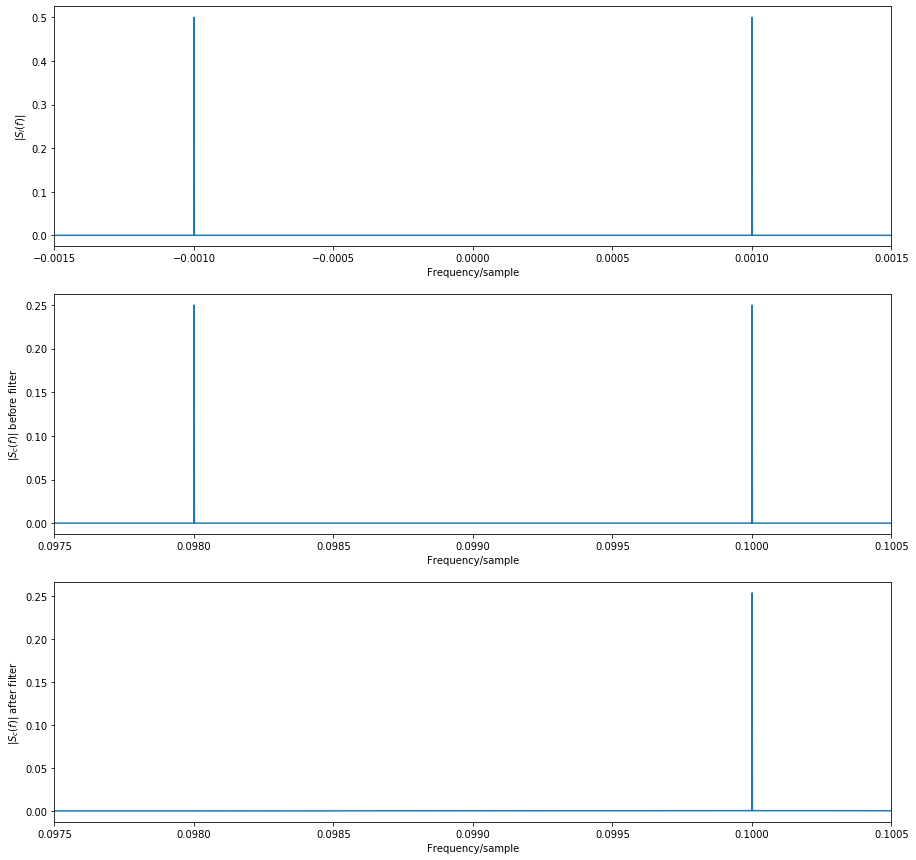

In [13]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)

plt.subplot(311)
plt.plot(freq,abs(sif)/N,'-')
plt.ylabel("$|S_i(f)|$")
plt.xlabel("Frequency/sample")
plt.xlim(-1.5*fi/fs,1.5*fi/fs)

plt.subplot(312)
plt.plot(freq,abs(scf_before)/N,'-')
plt.ylabel("$|S_c(f)|$ before filter")
plt.xlabel("Frequency/sample")
plt.xlim( (fc-fi)/fs-1.5*fi/fs,(fc-fi)/fs+1.5*fi/fs)

plt.subplot(313)
plt.plot(freq,abs(scf)/N,'-')
plt.ylabel("$|S_c(f)|$ after filter")
plt.xlabel("Frequency/sample")
plt.xlim( (fc-fi)/fs-1.5*fi/fs,(fc-fi)/fs+1.5*fi/fs)

plt.show()

#### Superheterodyne Conversion

Second, we can set $f_o=f_c+f_i$, so that the oscillator frequency is above the desired carrier frequency. This is referred to as *superheterodyne* conversion. In this case, $f_c = f_o - f_i$, and we want to maintain the frequency content centered at the difference of the oscillator and intermediate frequencies. We again bandpass filter the output at the frequency $f_c$ so that the frequency content centered at $f_o + f_i$ is eliminated.

This upconversion process is summarized in the figure below.

<img src="images/04.png" width="80%">

Again, the output signal at the carrier frequency satisfies

$$\begin{align}
s_c(t) =& m_1(t)\cos(2\pi f_c t + \vartheta) - m_2(t)\sin(2\pi f_c t + \vartheta) \\
=&\mathrm{Re}\left\{ m(t) e^{j2\pi f_c t} \right\}
\end{align}$$

From this development, we see that the second stage of upconversion, whether we use the sub- or super-heterodyne approach, gives us the same result. Furthermore, the result is mathematically equivalent direct converstion from baseband directly to the desired carrier frequency.

### Carrier to IF Passband Conversion

Now let $s_c(t)$ be a signal of passband bandwidth at most $2B$, $B > 0$, at the carrier frequency $f_c$. And suppose that we wish to convert this signal to be at an intermediate frequency $f_i$ such that $f_c > f_i > B$.

Again, we consider $s_c(t)$ to be of the form

$$s_c(t)=m_1(t)\cos(2\pi f_c t) - m_2(t)\sin(2\pi f_c t) = 2\mathrm{Re}\left\{m(t) e^{j2\pi f_c t} \right\}$$

for some baseband signal $m(t)$ for generality.







If we modulate $s_c(t)$ with a sinusoidal oscillator signal of frequency $f_o < f_c$, we have

$$\begin{align}
s_c(t) \cos(2\pi f_o t + \vartheta) =& m_1(t)\cos(2\pi f_c t)\cos(2\pi f_o t + \vartheta) - m_2(t)\sin(2\pi f_c t)\cos(2\pi f_o t + \vartheta) \\
=& \frac{1}{2} m_1(t)\left[\cos(2\pi (f_c+f_o) t + \vartheta) + \cos(2\pi (f_c-f_o) t + \vartheta) \right] \\
&- \frac{1}{2} m_2(t) \left[ \sin(2\pi (f_c+f_o) t + \vartheta) + \sin(2\pi (f_c-f_o) t + \vartheta)\right] \\
=& \frac{1}{2}\left\{ m_1(t)\cos(2\pi (f_c+f_o) t + \vartheta) - m_2(t)\sin(2\pi (f_c+f_o) t + \vartheta )\right\} \\
& + \frac{1}{2}\left\{ m_1(t)\cos(2\pi (f_c-f_o) t + \vartheta) - m_2(t)\sin(2\pi (f_c-f_o) t + \vartheta \right\} \\
=& \frac{1}{2}\mathrm{Re}\left\{ m(t) e^{j2\pi (f_c+f_o) t} \right\} + \frac{1}{2} \mathrm{Re}\left\{ m(t) e^{j2\pi (f_c-f_o) t} \right\}
\end{align}$$

Although this in principle leads to two ways to translate the frequency content to a target intermediate frequency $f_i$, typically we set the oscillator frequency $f_o = f_c-f_i$ and we bandpass filter the output centered at $f_i$, so that the frequency content centered at $f_c+f_o$ is eliminated. 

This downconversion process is summarized in the figure below.

<img src="images/05.png" width="80%">

[comment]: # (Why no superheterodyne on the receive side? Is there really superheterodyne on the transmit side?)

**Example**

In [ ]:
import numpy as np
import matplotlib.pylab as plt 
from scipy import fftpack
from scipy.signal import butter, lfilter

In [ ]:
fi = 1e6
fc = 1e8
B = 0.5e6
fs = 1e9
N = int(1e6)
n = np.arange(N,dtype = int)
t = n/fs

si = np.cos(2*np.pi*fi*t)
sc_before = si*np.cos(2*np.pi*(fc - fi)*t)

# bandpass filter (butterworth)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

lowcut = fc - B
highcut = fc + B

sc = butter_bandpass_filter(sc_before, lowcut, highcut, fs, order=5)


lowcut =  fi -B
highcut = fi + B


si_before = sc*np.cos(2*np.pi*(fc - fi)*t)
si = 2*butter_bandpass_filter(si_before, lowcut, highcut, fs, order=2)



# FFT
scf  = fftpack.fftshift(fftpack.fft(sc))
sif_before = fftpack.fftshift(fftpack.fft(si_before))
sif = fftpack.fftshift(fftpack.fft(si))
freq = np.linspace(-1/2,1/2,N)

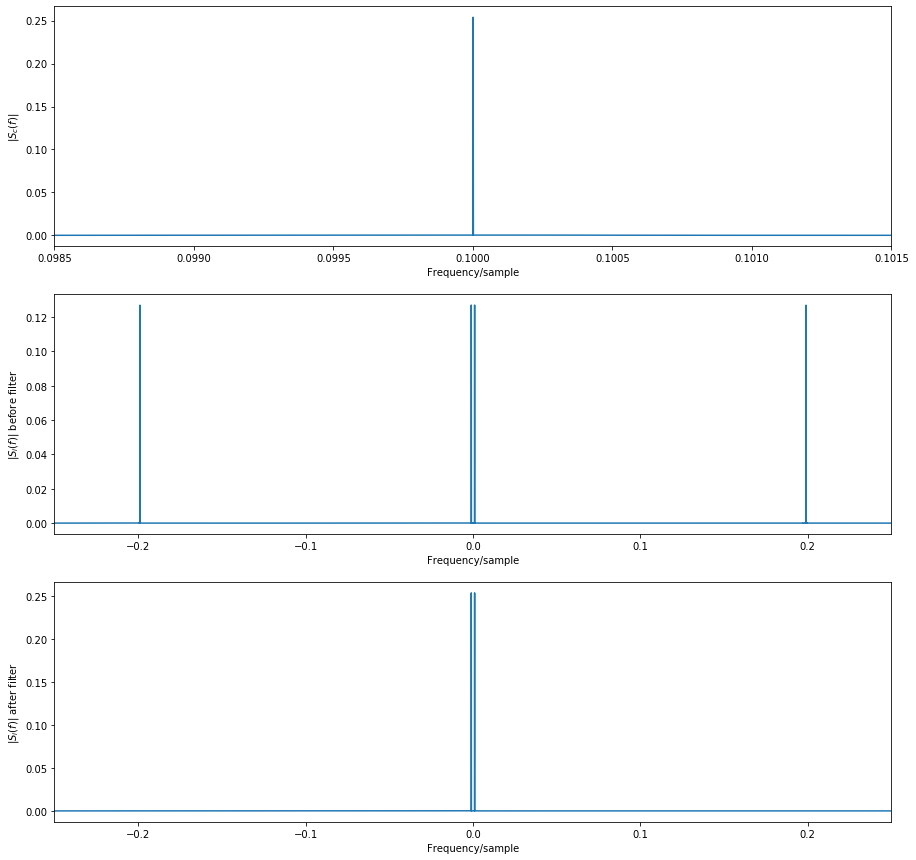

In [43]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)

plt.subplot(311)
plt.plot(freq,abs(scf)/N,'-')
plt.ylabel("$|S_c(f)|$")
plt.xlabel("Frequency/sample")
plt.xlim( fc/fs-1.5*fi/fs,fc/fs+1.5*fi/fs)

plt.subplot(312)
plt.plot(freq,abs(sif_before)/N,'-')
plt.ylabel("$|S_i(f)|$ before filter")
plt.xlabel("Frequency/sample")
plt.xlim(  -2.5*fc/fs, +2.5*fc/fs)

plt.subplot(313)
plt.plot(freq,abs(sif)/N,'-')
plt.ylabel("$|S_i(f)|$ after filter")
plt.xlabel("Frequency/sample")
plt.xlim(  -2.5*fc/fs, +2.5*fc/fs)

plt.show()

**Example**

The heterodyne receiver has an intermediate frequency (IF) of $20\,\rm{MHz}$. If the desired radio frequency is $1000\,\rm{MHz}$, what are the two possible frequencies for the local oscillator (LO)? What are the image frequencies corresponding to each of these LO and IF combination?

Solution:

Subheterodyne: LO is below RF.
\begin{align}
RF &= LO + IF\\\
\Rightarrow LO &= RF - IF = 1000 - 20 \,\rm{MHz} = 980 \,\rm{MHz}\\
IM & = 2 RF - LO = 960 \,\rm{MHz}
\end{align}

Superheterodyne: LO is above RF. 
\begin{align}
RF &= LO - IF\\\
\Rightarrow LO &= RF + IF = 1000 + 20 \,\rm{MHz} = 1020 \,\rm{MHz}\\
IM & = 2 RF - LO = 980 \,\rm{MHz}
\end{align}

## Circuit Issues


### Reduced Impact of LO Leakage and DC Offset

Recalling the implementation of the up- or down-conversions above via oscillators and mixers, we can now see how the carrier leakage and DC offsets can be reduced.

First, in the transmitter upconversion process, we were particularly concerned about LO leakage. For subheterodyne conversion, the leaked LO is at frequency $f_c - f_i$, but we have a bandpass filter centered at $f_c$. As long as $f_c - f_i \ll f_c - B$, the filter will significantly eliminate the LO leakage. This corresponds to having a reasonably large $f_i \gg B$.

Second, in the receiver downconversion process, we were particularly concerned about DC offset. Provided $f_i - B \gg 0$, this DC offet will be heavily filtered by the bandpass filter above. So again, this suggests using a relatively large intermediate frequency $f_i \gg B$.

In either aspect, the larger the intermediate frequency, the more flexibility we have in the transition band width and the stopband attenuations for the filters, giving us a great degree of flexibility in our radio designs.

### Circuits at IF Often Better Performing

For tunability, we can allow the target carrier frequency $f_c$ variable and fixe $f_i$. This allows for much more precise design of the circuits at $f_i$. In particular, the filters with center frequency $f_i$ can be designed to be very selective.

### Multiple Stages

Can cascade more than one intermediate frequency stage, so that we can have double heterodyne conversion, triple heterodyne conversion, and so forth.

### More Non-Linearities

Despite these benefits, we have to keep track of additional harmonics in heterodyne radios, which we address in the next lecture.